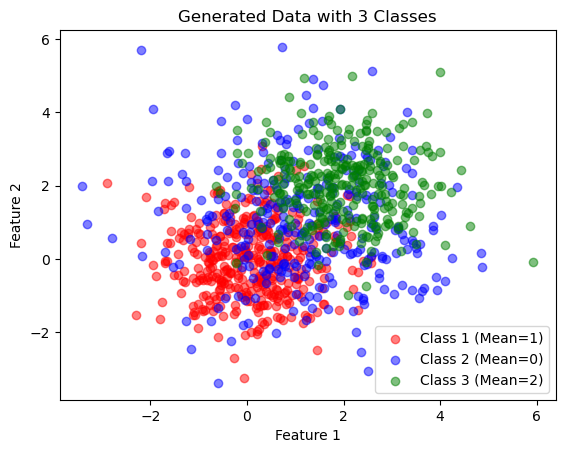

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3917 - loss: 1.0803 - val_accuracy: 0.6600 - val_loss: 0.9815
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6585 - loss: 0.9418 - val_accuracy: 0.6650 - val_loss: 0.8972
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.8161 - val_accuracy: 0.6750 - val_loss: 0.8294
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.7487 - val_accuracy: 0.6700 - val_loss: 0.7799
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6967 - loss: 0.7124 - val_accuracy: 0.6550 - val_loss: 0.7543
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6926 - loss: 0.6877 - val_accuracy: 0.6550 - val_loss: 0.7413
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.6598 - val_accuracy: 0.6550 - val_loss: 0.7330
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.6692 - val_accuracy: 0.6450 - val_loss:

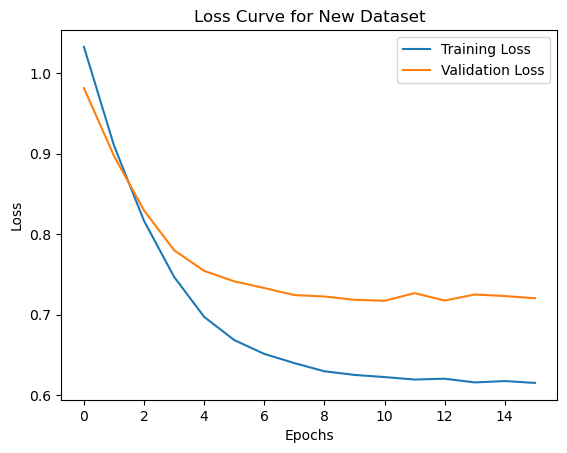

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


np.random.seed(42)

class_1 = np.random.normal(loc=0, scale=1, size=(400, 3))
class_2 = np.random.normal(loc=1, scale=1.5, size=(300, 3))
class_3 = np.random.normal(loc=2, scale=1, size=(300, 3))

X = np.vstack([class_1, class_2, class_3])

y = np.array([0]*400 + [1]*300 + [2]*300)

plt.scatter(X[:400, 0], X[:400, 1], color='red', label='Class 1 (Mean=1)', alpha=0.5)
plt.scatter(X[400:700, 0], X[400:700, 1], color='blue', label='Class 2 (Mean=0)', alpha=0.5)
plt.scatter(X[700:, 0], X[700:, 1], color='green', label='Class 3 (Mean=2)', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Generated Data with 3 Classes')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(3,)),                    # Define input shape explicitly using Input layer
    Dense(16, activation='sigmoid'),
    Dense(16, activation='tanh'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for New Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Random Forest Accuracy: 0.6700


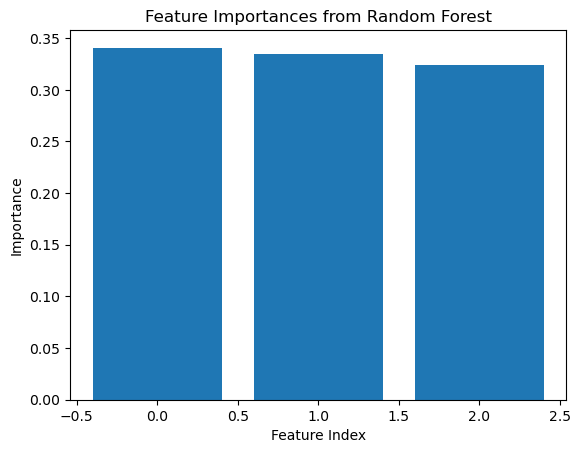

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Optionally, plot feature importances
plt.bar(range(X.shape[1]), rf_model.feature_importances_)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

SVM Accuracy: 0.6050


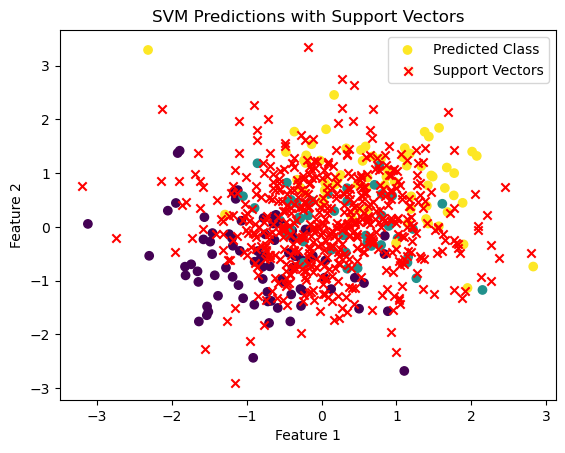

In [11]:
# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

# Optionally, visualize the support vectors
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', label='Predicted Class')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], color='red', marker='x', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Predictions with Support Vectors')
plt.show()


Gradient Boosting Accuracy: 0.7000


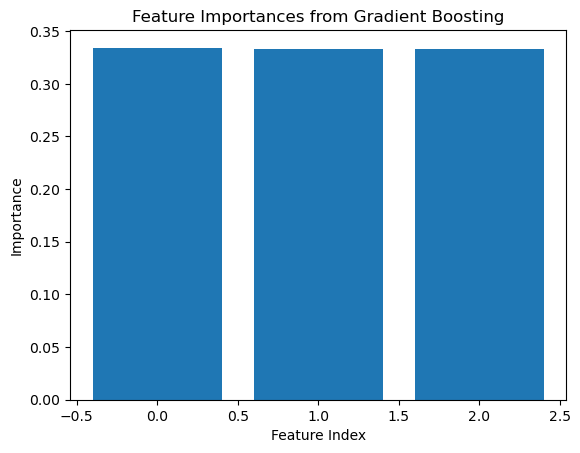

In [12]:

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

plt.bar(range(X.shape[1]), gb_model.feature_importances_)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances from Gradient Boosting')
plt.show()

Random Forest Accuracy: 0.7060
SVM Accuracy: 0.7015


c:\Users\felip\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.7320


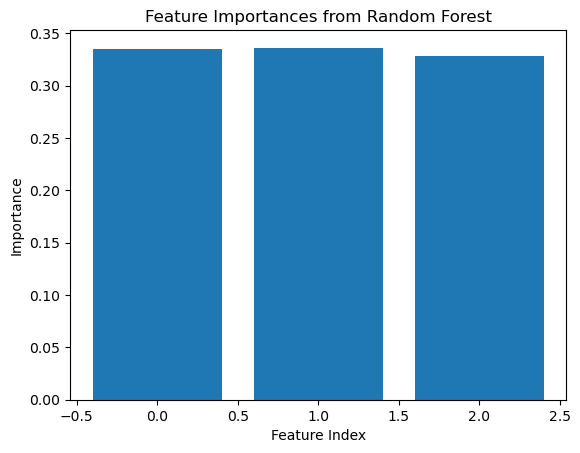

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate new data
np.random.seed(42)

# Class 1: 400 samples, mean=0, std=1
class_1 = np.random.normal(loc=0, scale=1, size=(4000, 3))

# Class 2: 300 samples, mean=1, std=1.5
class_2 = np.random.normal(loc=1, scale=1.5, size=(3000, 3))

# Class 3: 300 samples, mean=2, std=1
class_3 = np.random.normal(loc=2, scale=1, size=(3000, 3))

# Combine the data
X = np.vstack([class_1, class_2, class_3])

# Labels for each class
y = np.array([0]*4000 + [1]*3000 + [2]*3000)

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate different models

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Neural Network Model (MLP)
nn_model = Sequential([
    Dense(16, input_dim=3, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), verbose=0)

nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

# Plot feature importances for Random Forest
plt.bar(range(X.shape[1]), rf_model.feature_importances_)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()
